### Завдання:
На основі файлу banking.csv, що міститься в репозиторії лекції, виконайте наступні дії:
1. Сформуйте тестовий та тренувальний датасети (розмір тестової вибірки 0.3)
2. Застосуйте логістичну регресію для прогнозування цільової метрики у (ймовірність того, що клієнт відкриє вклад у банку)
3. Оцініть модель за допомогою матриці похибок, метрик precision, recall, F1-score. Побудуйте AUC-ROC криву для моделі.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn. model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

##### Імпорт даних:

In [48]:
data = pd.read_csv('banking.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


##### Підготовка даних:

In [89]:
data.dropna(axis=0, subset=['y'], inplace=True)

numeric_cols = [cname for cname in data.columns if data[cname].dtype in ['int64', 'float64']]
y = data.y
X = data[numeric_cols].copy()
X.drop(['y'], axis=1, inplace=True)

pd.concat([X, y], axis=1).head()
# data.isnull().sum()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1


##### Розбивка даних на тестовий та тренувальний набори:

In [58]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train,X_test,y_train,y_test = train_test_split (X_scaled,y,test_size=0.3,random_state=0)

##### Створення моделі логістичної регресії, отримання прогнозних даних:

In [59]:
log_regression = LogisticRegression()
log_regression. fit (X_train,y_train)

LogisticRegression()

In [60]:
y_pred = log_regression.predict(X_test)

##### Оцінка якості отриманого прогнозу:

In [61]:
cnf_matrix = metrics.confusion_matrix (y_test, y_pred)
print('Confusion matrix: ')
cnf_matrix

Confusion matrix: 


array([[10724,   257],
       [  840,   536]], dtype=int64)

Text(0.5, 23.52222222222222, 'Actual result')

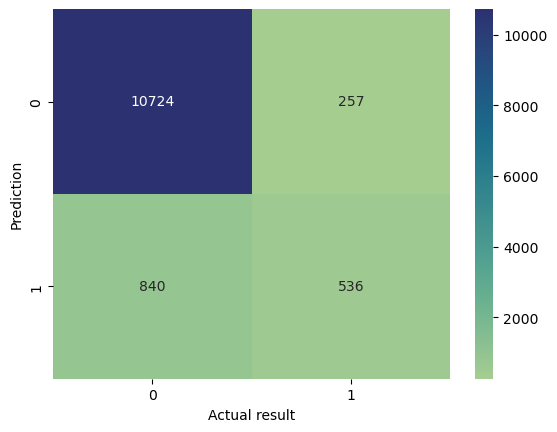

In [88]:
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='crest')
plt.ylabel('Prediction')
plt.xlabel('Actual result')

##### Показники якості моделі:

In [63]:
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}')
print(f'Precision: {metrics.precision_score(y_test, y_pred):.4f}')
print(f"Recall: {metrics.recall_score(y_test, y_pred):.4f}")
print(f'F1: {metrics.f1_score(y_test, y_pred):.4f}')

Accuracy: 0.9112
Precision: 0.6759
Recall: 0.3895
F1: 0.4942


##### Побудова ROC-AUC кривої:

In [64]:
y_pred_proba = log_regression.predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print(f'ROC-AUC = {auc:.2f}')

ROC-AUC = 0.92


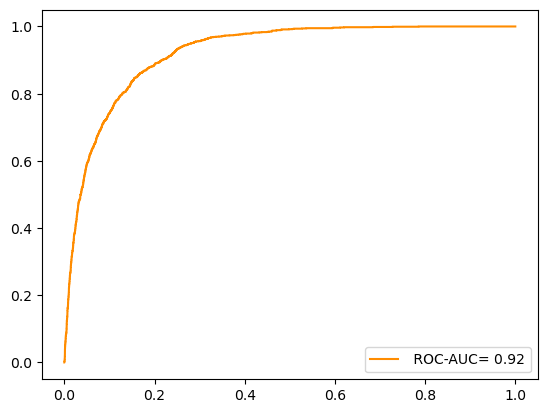

In [92]:
plt.plot (fpr, tpr, label=" ROC-AUC= "+ str(f'{auc:.2f}'), color='darkorange')
plt.legend(loc=4)
plt.show()

#### Незважаючи на високі показники Асс = 0.91 і ROC-AUC = 0.92 ми не можемо стверджувати, що збудована модель класифікації даних достатньо якісна.
#### Ми маємо справу з незбалансованою задачею, тому приорітетним показником буде  F1, який є гармонійним середнім від показників Precision та Recall. А його значення 0.49 є досить низьким.